<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#15.-Матричное-умножение" data-toc-modified-id="15.-Матричное-умножение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>15. Матричное умножение</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# 15. Матричное умножение
Вычисление элементов произведения $C$ двух квадратных матриц $A=(a_{ij})$ и $B=(b_{ij})$ по формулам$$
c_{ij} = \sum_{k=1}^n a_{ik} b_{kj} \qquad (i=1,2,\dots,n;~ j=1,2,\dots,n)
$$легко реализуется с помощью трех вложенных циклов: по $i$, по $j$ и по $k$. Различные варианты алгоритма можно получить перестановкой циклов. Напишите шесть функций multijk, multikj, multjik, ..., реализующих каждый из этих вариантов. Для серии случайно сгенерированных матриц больших размеров замерьте время, требуемое этими функциями и стандартной операцией @. Нарисуйте графики зависимости времени от порядка матриц. Объясните, почему требуется различное время на выполнение каждой из написанных вами функций.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

Реализуем функции со вложенными циклами и функцию с умножением через @

In [11]:
defaul = []
kij = []
kji = []
ijk = []
ikj = []
jik = []
jki = []

def default():
    start_time = time.time() 
    C = A @ B
    defaul.append(time.time() - start_time)


def multkij(ord):
    i = j = k = ord
    start_time = time.time() 
    C = np.zeros(shape=(k, k))
    for _k in range(k):
        for _i in range(i):
            for _j in range(j):
                C[_i, _j] += A[_i, _k] * B[_k, _j]
    kij.append(time.time() - start_time)

    
def multkji(ord):
    i = j = k = ord
    start_time = time.time()
    C = np.zeros(shape=(k, k))
    for _k in range(k):
        for _j in range(j):
            for _i in range(i):
                C[_i, _j] += A[_i, _k] * B[_k, _j]
    kji.append(time.time() - start_time)

    
def multijk(ord):
    i = j = k = ord
    start_time = time.time()
    C = np.zeros(shape=(k, k))
    for _i in range(i):
        for _j in range(j):
            for _k in range(k):
                C[_i, _j] += A[_i, _k] * B[_k, _j]
    ijk.append(time.time() - start_time)

def multikj(ord):
    i = j = k = ord
    start_time = time.time()
    C = np.zeros(shape=(k, k))
    for _i in range(i):
        for _k in range(k):
            for _j in range(j):
                C[_i, _j] += A[_i, _k] * B[_k, _j]
    ikj.append(time.time() - start_time)
    
def multjik(ord):
    i = j = k = ord
    start_time = time.time()
    C = np.zeros(shape=(k, k))
    for _j in range(j):
        for _i in range(i):
            for _k in range(k):
                C[_i, _j] += A[_i, _k] * B[_k, _j]
    jik.append(time.time() - start_time)
    
def multjki(ord):
    i = j = k = ord
    start_time = time.time()
    C = np.zeros(shape=(k, k))
    for _j in range(j):
        for _k in range(k):
            for _i in range(i):
                C[_i, _j] += A[_i, _k] * B[_k, _j]
    jki.append(time.time() - start_time)
    
for i in range(2, 50):
    A = np.random.random((i,i))
    B = np.random.random((i,i))
    order = i
    
    default()
    multkij(order)
    multkji(order)
    multijk(order)
    multikj(order)
    multjik(order)
    multjki(order)

Построим графики зависимости времени от порядка матрицы

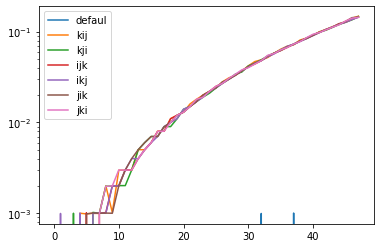

In [12]:
plt.semilogy(defaul, label='defaul')
plt.semilogy(kij, label='kij')
plt.semilogy(kji, label='kji')
plt.semilogy(ijk, label='ijk')
plt.semilogy(ikj, label='ikj')
plt.semilogy(jik, label='jik')
plt.semilogy(jki, label='jki')
plt.legend()
pass


# Вывод
1) На графике видно, что умножение через @ в крайних случаях выполняется дольще чем с нулевой задержкой.

2) Времея выполнения функций со вложенными циклами возрастает по мере увелечения порядка матриц.

3) 6 реализованных нами функций на сакмом деле ничем не отличаются друг от друга, а небольшая разница во времени обусловленна механинзмами самого языка.
